In [53]:
# Roll Nos : 23B0977 (Keyaan Kartikeya Rajesh), 23B1052 (Ramachandran S), 23B1085 (Harith S)
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def mase(actual, forecast, train_data):
    naive_forecast = train_data.shift(1).dropna()
    mae_naive = mean_absolute_error(train_data[1:], naive_forecast)
    return mean_absolute_error(actual, forecast) / mae_naive

In [55]:
def mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [56]:
def report_errors(test_data, forecast, train_data):
    mase_value = mase(test_data, forecast, train_data)
    mape_value = mape(test_data, forecast)
    return mase_value, mape_value

In [57]:
def forecast(data):
    data = data.copy()

    # group the data by day and count the no of vehicles entering
    data = data[data['camera_id'] == 1].groupby(data['timestamp'].dt.date)['vehicle_no'].size()
    data.index = pd.to_datetime(data.index)
    data = data.asfreq('D')

    # split the data as 8 weeks to train, 1 week to test on
    train_data = data[:-7]
    test_data = data[-7:]

    ets_model = ExponentialSmoothing(
        train_data,
        seasonal='add',
        seasonal_periods=7, # weekly seasonality
        trend='add'
    )
    ets_fitted = ets_model.fit()
    ets_forecast = ets_fitted.forecast(steps=7)

    plt.plot(train_data.index, train_data, label = 'Training Data', color = 'blue')
    plt.plot(test_data.index, test_data, label = 'Testing Data', color = 'green')
    plt.plot(ets_forecast.index, ets_forecast, label = 'ETS Forecast', linestyle = '--', color = 'orange')
    plt.title('Total Vehicles Entering on a Day')
    plt.gca().get_xaxis().set_visible(False)
    plt.legend()
    plt.show()
    plt.close()

    print(f'\nETS Forecast\n')
    print(ets_forecast)
    print()

    ets_mase, ets_mape = report_errors(test_data, ets_forecast, train_data)
    print(f'ETS MASE: {ets_mase:.3f}')
    print(f'ETS MAPE: {ets_mape:.3f}\n')

In [58]:
data = pd.read_csv('parkingLot (1).csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values(by='timestamp')

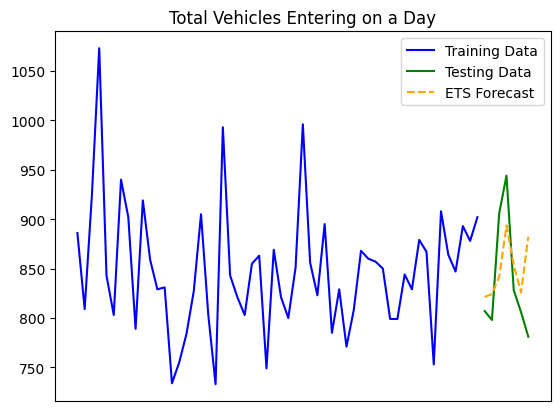


ETS Forecast

2024-11-07    821.253719
2024-11-08    824.257625
2024-11-09    841.777897
2024-11-10    893.593318
2024-11-11    853.704968
2024-11-12    825.795615
2024-11-13    882.305055
Freq: D, dtype: float64

ETS MASE: 0.636
ETS MAPE: 5.145



In [59]:
forecast(data)